In [31]:
import pandas as pd 
import matplotlib.pyplot as plt


In [32]:
df_scores = pd.read_excel('Articles_to_Score_Complete.xlsx')

df_scores.head()

,Column1,Manual.summary,Classification Joaquin,Classification Rui,Classification Ed
0,0,"Speaking at the IMF in Washington, ECB Presi...",Hawkish,Hawkish,Hawkish
1,1,"Starting in October, the ECB wants to use a ...",Neutral,Neutral,Neutral
2,2,ECB Chief Economist Philip Lane has proposed ...,Hawkish,Neutral,Hawkish
3,3,Former German Chancellor Angela Merkel has rec...,Neutral,Neutral,Neutral
4,4,The ECB has raised its interest rates again ...,Hawkish,Hawkish,Hawkish


In [33]:
print(df_scores.columns)

Index(['Column1', 'Manual.summary', 'Classification Joaquin',
       'Classification Rui', 'Classification Ed'],
      dtype='object')


In [34]:
# Define the mapping
mapping = {
    "Hawkish": 1,
    "Neutral": 0,
    "Dovish": -1
}

# Apply the mapping to the relevant columns
columns_to_convert = ['Classification Joaquin', 'Classification Rui', 'Classification Ed']
for column in columns_to_convert:
    df_scores[column] = df_scores[column].map(mapping)

# Save the modified DataFrame to a new Excel file if needed
df_scores.to_excel('Articles_to_Score_Complete_Converted.xlsx', index=False)

# Display the first few rows of the modified DataFrame
df_scores.head()

,Column1,Manual.summary,Classification Joaquin,Classification Rui,Classification Ed
0,0,"Speaking at the IMF in Washington, ECB Presi...",1,1,1
1,1,"Starting in October, the ECB wants to use a ...",0,0,0
2,2,ECB Chief Economist Philip Lane has proposed ...,1,0,1
3,3,Former German Chancellor Angela Merkel has rec...,0,0,0
4,4,The ECB has raised its interest rates again ...,1,1,1


In [35]:
df_scores['Average_Classification'] = df_scores[columns_to_convert].mean(axis=1)
df_scores.head()

,Column1,Manual.summary,Classification Joaquin,Classification Rui,Classification Ed,Average_Classification
0,0,"Speaking at the IMF in Washington, ECB Presi...",1,1,1,1.000000
1,1,"Starting in October, the ECB wants to use a ...",0,0,0,0.000000
2,2,ECB Chief Economist Philip Lane has proposed ...,1,0,1,0.666667
3,3,Former German Chancellor Angela Merkel has rec...,0,0,0,0.000000
4,4,The ECB has raised its interest rates again ...,1,1,1,1.000000


In [36]:
# Initialize a dictionary to store the results
results = {
    'Prompt': [],
    'Counts_Dovish': [],
    'Counts_Neutral': [],
    'Counts_Hawkish': [],
    'Standard Deviation': [],
    'Median': [],
    'Average': []
}

# Calculate the counts, standard deviation, median, and average for each prompt
for index, row in df_scores.iterrows():
    prompt = row['Manual.summary']
    scores = pd.Series([row['Classification Joaquin'], row['Classification Rui'], row['Classification Ed']])
    
    # Calculate counts for each classification
    counts = scores.value_counts().to_dict()
    counts_dovish = counts.get(-1, 0)
    counts_neutral = counts.get(0, 0)
    counts_hawkish = counts.get(1, 0)
    
    # Calculate standard deviation, median, and average
    std_dev = scores.std()
    median = scores.median()
    average = scores.mean()
    
    # Store the results
    results['Prompt'].append(prompt)
    results['Counts_Dovish'].append(counts_dovish)
    results['Counts_Neutral'].append(counts_neutral)
    results['Counts_Hawkish'].append(counts_hawkish)
    results['Standard Deviation'].append(std_dev)
    results['Median'].append(median)
    results['Average'].append(average)

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Display the results DataFrame
print("Classification and scoring summary:")
results_df

Classification and scoring summary:


,Prompt,Counts_Dovish,Counts_Neutral,Counts_Hawkish,Standard Deviation,Median,Average
0,"Speaking at the IMF in Washington, ECB Presi...",0,0,3,0.000000,1.0,1.000000
1,"Starting in October, the ECB wants to use a ...",0,3,0,0.000000,0.0,0.000000
2,ECB Chief Economist Philip Lane has proposed ...,0,1,2,0.577350,1.0,0.666667
3,Former German Chancellor Angela Merkel has rec...,0,3,0,0.000000,0.0,0.000000
4,The ECB has raised its interest rates again ...,0,0,3,0.000000,1.0,1.000000
...,...,...,...,...,...,...,...
95,The long-term lending rules for banks might be...,0,3,0,0.000000,0.0,0.000000
96,"In an interview, Isabel Camarinha, CGTP Secret...",2,0,1,1.154701,-1.0,-0.333333
97,Credit agency Fitch has warned high inflation,0,1,2,0.577350,1.0,0.666667
98,The Agenda for relevant events for the week of...,0,3,0,0.000000,0.0,0.000000


In [51]:
# Initialize a dictionary to store the results
results = {
    'Prompt': [],
    'Classification Joaquin': [],
    'Classification Rui': [],
    'Classification Ed': [],
    'Counts_Dovish': [],
    'Counts_Neutral': [],
    'Counts_Hawkish': [],
    'Standard Deviation': [],
    'Median': [],
    'Average': []
}

# Calculate the counts, standard deviation, median, and average for each prompt
for index, row in df_scores.iterrows():
    prompt = row['Manual.summary']
    scores = pd.Series([row['Classification Joaquin'], row['Classification Rui'], row['Classification Ed']])
    
    # Calculate counts for each classification
    counts = scores.value_counts().to_dict()
    counts_dovish = counts.get(-1, 0)
    counts_neutral = counts.get(0, 0)
    counts_hawkish = counts.get(1, 0)
    
    # Calculate standard deviation, median, and average
    std_dev = scores.std()
    median = scores.median()
    average = scores.mean()
    
    # Store the results
    results['Prompt'].append(prompt)
    results['Classification Joaquin'].append(row['Classification Joaquin'])
    results['Classification Rui'].append(row['Classification Rui'])
    results['Classification Ed'].append(row['Classification Ed'])
    results['Counts_Dovish'].append(counts_dovish)
    results['Counts_Neutral'].append(counts_neutral)
    results['Counts_Hawkish'].append(counts_hawkish)
    results['Standard Deviation'].append(std_dev)
    results['Median'].append(median)
    results['Average'].append(average)

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Calculate overall statistics for each classifier including counts of each classification
overall_stats = {
    'Classifier': ['Joaquin', 'Rui', 'Ed'],
    'Standard Deviation': [
        df_scores['Classification Joaquin'].std(),
        df_scores['Classification Rui'].std(),
        df_scores['Classification Ed'].std()
    ],
    'Median': [
        df_scores['Classification Joaquin'].median(),
        df_scores['Classification Rui'].median(),
        df_scores['Classification Ed'].median()
    ],
    'Average': [
        df_scores['Classification Joaquin'].mean(),
        df_scores['Classification Rui'].mean(),
        df_scores['Classification Ed'].mean()
    ],
    'Counts_Dovish': [
        (df_scores['Classification Joaquin'] == -1).sum(),
        (df_scores['Classification Rui'] == -1).sum(),
        (df_scores['Classification Ed'] == -1).sum()
    ],
    'Counts_Neutral': [
        (df_scores['Classification Joaquin'] == 0).sum(),
        (df_scores['Classification Rui'] == 0).sum(),
        (df_scores['Classification Ed'] == 0).sum()
    ],
    'Counts_Hawkish': [
        (df_scores['Classification Joaquin'] == 1).sum(),
        (df_scores['Classification Rui'] == 1).sum(),
        (df_scores['Classification Ed'] == 1).sum()
    ]
}

# Create a DataFrame from the overall statistics dictionary
overall_stats_df = pd.DataFrame(overall_stats)

# Display the results DataFrame
print("Classification and scoring summary:")
display(results_df)

# Display the overall statistics DataFrame
print("\nOverall classifier statistics:")
display(overall_stats_df)

Classification and scoring summary:


,Prompt,Classification Joaquin,Classification Rui,Classification Ed,Counts_Dovish,Counts_Neutral,Counts_Hawkish,Standard Deviation,Median,Average
0,"Speaking at the IMF in Washington, ECB Presi...",1,1,1,0,0,3,0.000000,1.0,1.000000
1,"Starting in October, the ECB wants to use a ...",0,0,0,0,3,0,0.000000,0.0,0.000000
2,ECB Chief Economist Philip Lane has proposed ...,1,0,1,0,1,2,0.577350,1.0,0.666667
3,Former German Chancellor Angela Merkel has rec...,0,0,0,0,3,0,0.000000,0.0,0.000000
4,The ECB has raised its interest rates again ...,1,1,1,0,0,3,0.000000,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...
95,The long-term lending rules for banks might be...,0,0,0,0,3,0,0.000000,0.0,0.000000
96,"In an interview, Isabel Camarinha, CGTP Secret...",1,-1,-1,2,0,1,1.154701,-1.0,-0.333333
97,Credit agency Fitch has warned high inflation,0,1,1,0,1,2,0.577350,1.0,0.666667
98,The Agenda for relevant events for the week of...,0,0,0,0,3,0,0.000000,0.0,0.000000



Overall classifier statistics:


,Classifier,Standard Deviation,Median,Average,Counts_Dovish,Counts_Neutral,Counts_Hawkish
0,Joaquin,0.658971,1.0,0.49,9,33,58
1,Rui,0.658741,1.0,0.52,9,30,61
2,Ed,0.666667,0.5,0.40,10,40,50


In [52]:
import openai
import pandas as pd
import time
import os  # To access environment variables

add counts of hawkish, neutral, dovish to this dataframe

In [53]:
# Save the DataFrame to a CSV file
df_scores.to_csv('Random_Articles_to_Score_Complete_Converted.csv', index=False)
overall_stats_df.to_csv('Manual_Classifier_Statistics.csv', index=False)

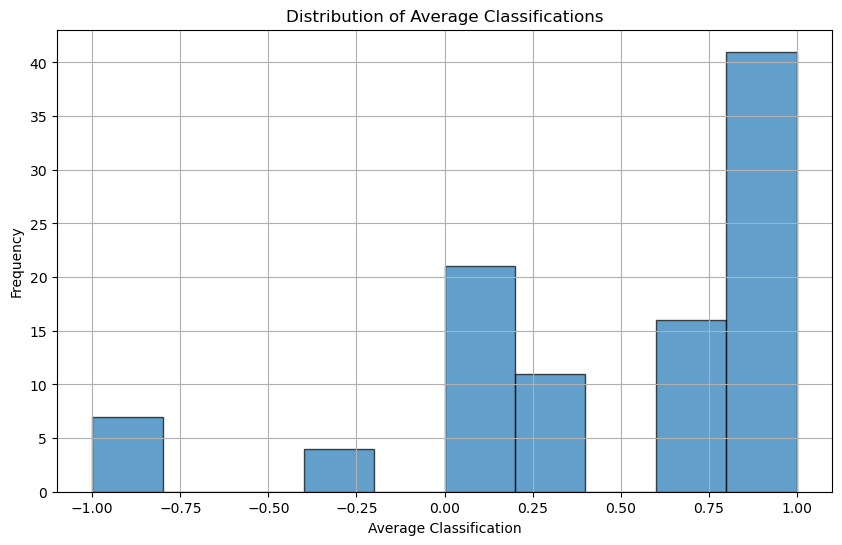

: 

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(df_scores['Average_Classification'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Distribution of Average Classifications')
plt.xlabel('Average Classification')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
